Importing the need library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nasdaqdatalink as nsq
import mplfinance as mpl
import datetime
import requests
from dotenv import dotenv_values

Setting the Api configuration

In [2]:
cred = dotenv_values(".env")
nasdaqlnk = cred["NASDAG_LINK_API_KEY"]
nsq.ApiConfig.api_key = nasdaqlnk

In [3]:
start_date = datetime.datetime(2012, 1, 1)
end_date = datetime.datetime(2018, 1, 1)

In [4]:
def nasdaq_reader(ticker, start_date, end_date):
    """returns a dataframe of ticker from nasdaqlink api of specified ticker and date range"""

    api_endpoint = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{ticker}/data.json?start_date={start_date}&end_date={end_date}&api_key={nasdaqlnk}"
    response = requests.get(url=api_endpoint).json()
    data = pd.DataFrame(response['dataset_data']['data'], columns=response['dataset_data']['column_names'])
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()
    return data[['Open', 'High', 'Low', 'Close', 'Volume']]


In [5]:
tesla = nasdaq_reader('TSLA', start_date, end_date)

In [6]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928100.0
2012-01-04,28.21,28.67,27.50,27.71,630100.0
2012-01-05,27.76,27.93,26.85,27.12,1005500.0
2012-01-06,27.20,27.79,26.41,26.91,986300.0
2012-01-09,27.00,27.49,26.12,27.25,897000.0


In [7]:
gm = nasdaq_reader('GM', start_date, end_date)

In [8]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321300.0
2012-01-04,21.05,21.37,20.75,21.15,7856700.0
2012-01-05,21.10,22.29,20.96,22.17,17880600.0
2012-01-06,22.26,23.03,22.24,22.92,18234500.0
2012-01-09,23.20,23.43,22.70,22.84,12084500.0


In [9]:
ford = nasdaq_reader('F',start_date, end_date)

In [10]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709900.0
2012-01-04,11.15,11.53,11.07,11.30,79725200.0
2012-01-05,11.33,11.63,11.24,11.59,67877500.0
2012-01-06,11.74,11.80,11.52,11.71,59840700.0
2012-01-09,11.83,11.95,11.70,11.80,53981500.0


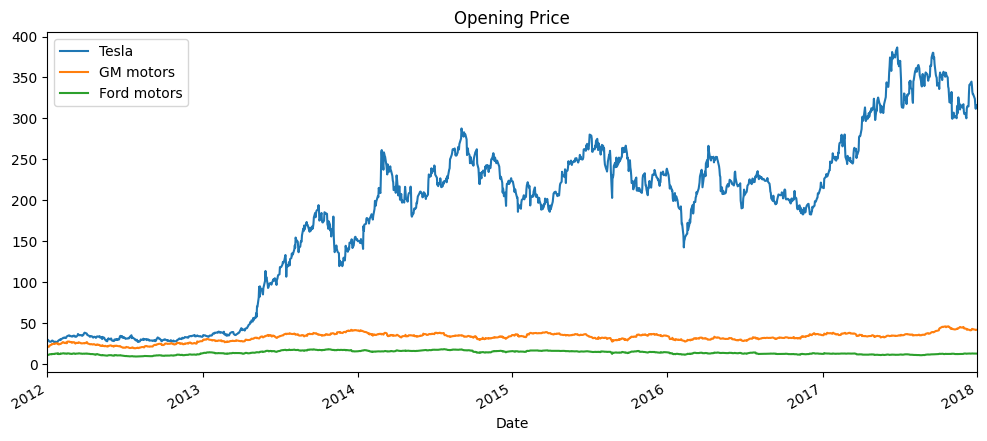

In [11]:
tesla['Open'].plot(label="Tesla", figsize=(12,5), title="Opening Price")
gm['Open'].plot(label='GM motors')
ford['Open'].plot(label='Ford motors')
plt.xlim('2012-1-1', '2018-1-1')
plt.legend()

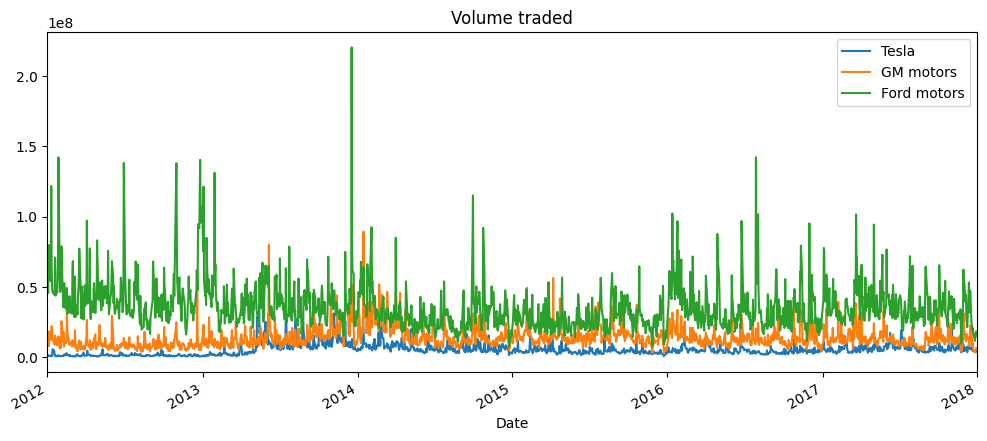

In [12]:
tesla['Volume'].plot(label="Tesla", figsize=(12,5), title="Volume traded")
gm['Volume'].plot(label='GM motors')
ford['Volume'].plot(label='Ford motors')
plt.xlim('2012-1-1', '2018-1-1')
plt.legend()

In [13]:
ford['Volume'].max(), ford['Volume'].idxmax()

(220363000.0, Timestamp('2013-12-18 00:00:00'))

In 2013-12-18 for had a high spike in total volume traded about 220M volume. from the article on cnbc
 [CNBC article](https://www.cnbc.com/2013/12/18/fords-stock-dives-as-company-warns-on-overseas-profits.html).  <em style="color:green;">Ford 
said Wednesday it expects lower pretax profit in 2014 and that its target for global automotive operating margin is at risk, due to economic conditions in Europe and South America, driving Ford shares down more than 4 percent.

Ford said it expects global pretax profit would be between $7 billion and $8 billion next year, down from an estimated $8.5 billion in 2013. Previously, Ford had said its 2013 profit would exceed $8 billion." </em>

Hence the reason for the high spike in volume traded for ford.

In [14]:
def moving_average(period, data, level):
    data[f"MA{period}"] = data[level].rolling(period).mean()
    return data


In [15]:
gm = moving_average(50, gm, 'Open')

In [16]:
gm = moving_average(200, gm, 'Open')

In [17]:
gm.head()

,Open,High,Low,Close,Volume,MA50,MA200
Date,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321300.0,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856700.0,NaN,NaN
2012-01-05,21.10,22.29,20.96,22.17,17880600.0,NaN,NaN
2012-01-06,22.26,23.03,22.24,22.92,18234500.0,NaN,NaN
2012-01-09,23.20,23.43,22.70,22.84,12084500.0,NaN,NaN


<Axes: xlabel='Date'>

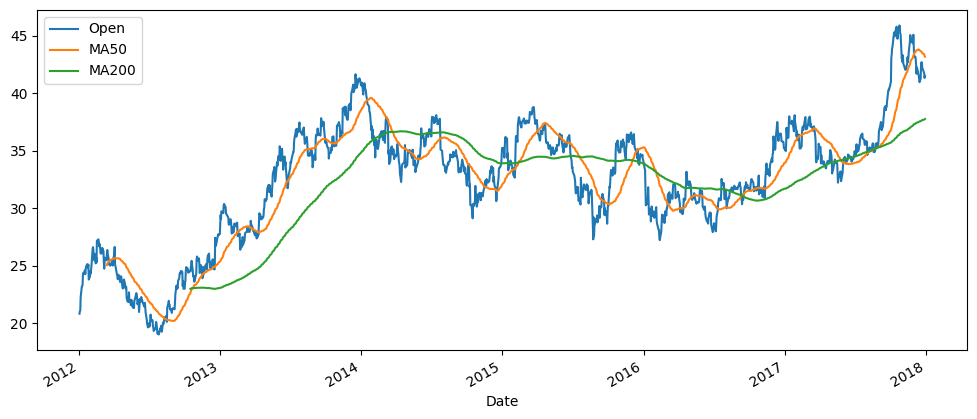

In [18]:
gm[['Open', 'MA50', 'MA200']].plot(figsize=(12, 5))

To smoothen out the noise in the open and see the overall trend, get 50 and 200 moving averages.

checking if there are some relations between this stock 

In [20]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [21]:
car_comp

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83
...,...,...,...
2017-12-22,329.51,42.23,12.62
2017-12-26,323.83,41.86,12.57
2017-12-27,316.00,41.76,12.57


<Figure size 1200x800 with 0 Axes>

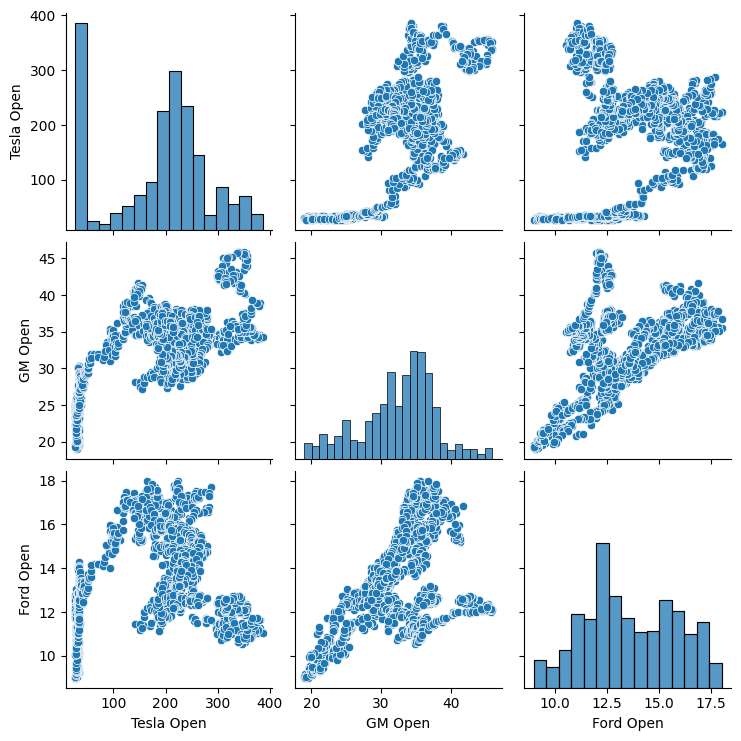

In [22]:

plt.figure(figsize=(12,8))
sns.pairplot(data=car_comp)

In [23]:
from pandas.plotting import scatter_matrix

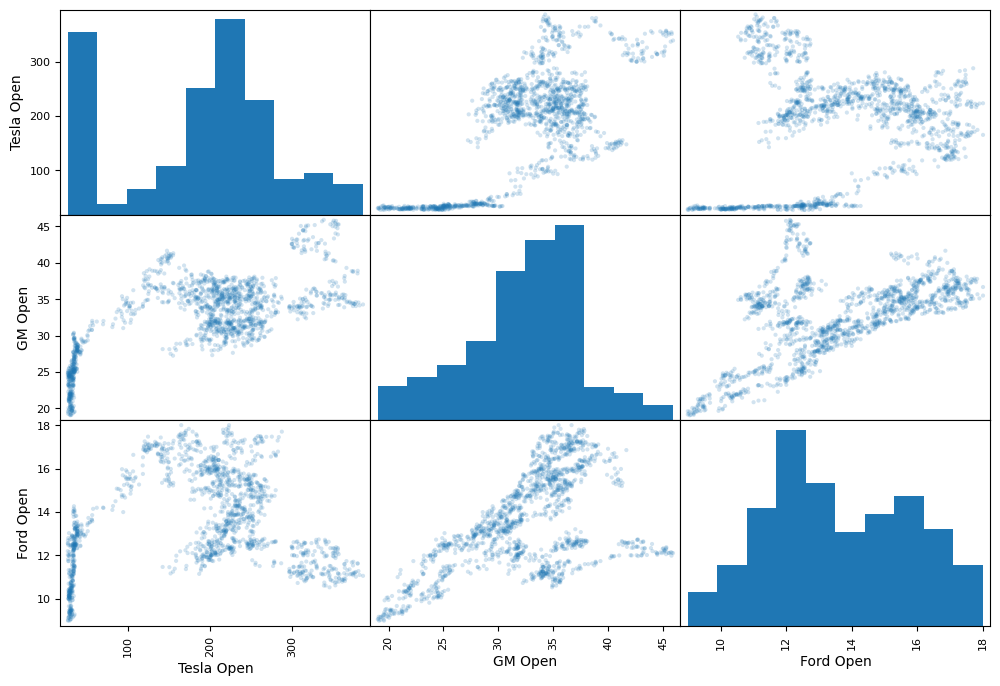

In [24]:
scatter_matrix(car_comp, alpha=0.2, figsize=(12,8));

In [25]:
import mplfinance as mpl

In [26]:
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA50', 'MA200'], dtype='object')

In [27]:
gm_ophlc = gm[['Open', 'High', 'Low', 'Close', 'Volume']]

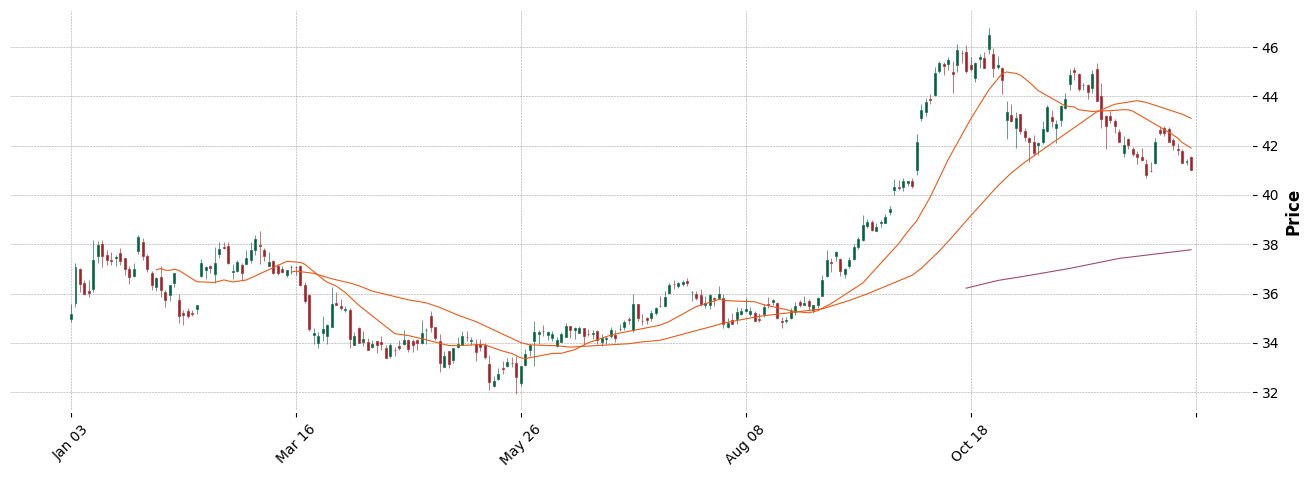

In [28]:

mpl.plot(gm_ophlc.loc['2017-01-01':,], type='candle', figratio=(24,8), mav=[20, 50, 200], style="charles", figscale=1)

In [29]:
tesla_ohlc = tesla[['Open', 'High', 'Low', 'Close', 'Volume']]


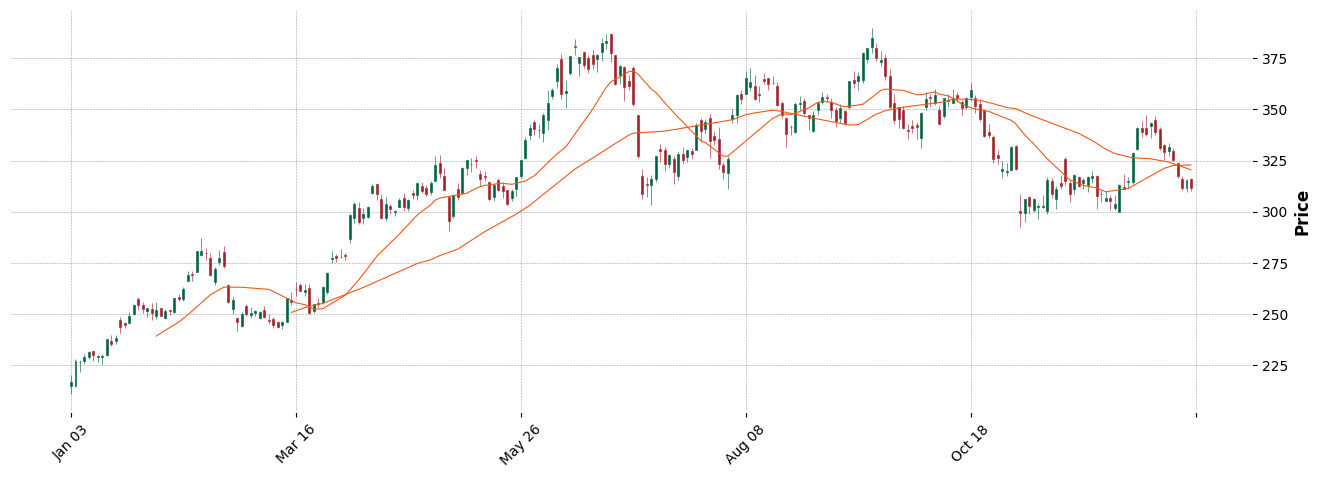

In [30]:
mpl.plot(tesla_ohlc.loc['2017-01-01':,], type='candle', figratio=(24,8), mav=[20, 50], style="charles", figscale=1)

In [31]:
ford_ohlc = ford[['Open', 'High', 'Low', 'Close', 'Volume']]

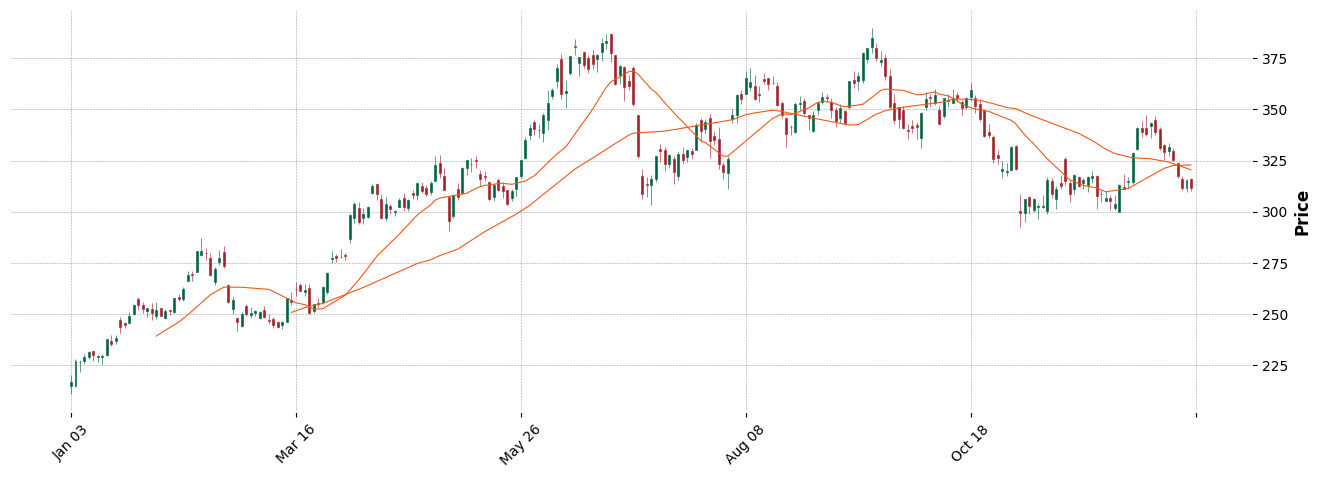

In [32]:
mpl.plot(tesla_ohlc.loc['2017-01-01':,], type='candle', figratio=(24,8), mav=[20, 50], style="charles", figscale=1)

Daily Percent change

$$  r_t = \frac{p_t}{p_{t-1}} -1$$

The return at particular time ($ r_t $) is the price at that time ($ p_t $) divided by the price the previous day ($ p_{t-1} $) all minus 1
The daily return is help to known how volatile your market is.

In [33]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [34]:
ford['returns'] = ford['Close'].pct_change(1)

In [35]:
gm['returns'] = gm['Close'].pct_change(1)

In [36]:
tesla

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2012-01-03,28.94,29.5000,27.65,28.08,928100.0,NaN
2012-01-04,28.21,28.6700,27.50,27.71,630100.0,-0.013177
2012-01-05,27.76,27.9300,26.85,27.12,1005500.0,-0.021292
2012-01-06,27.20,27.7900,26.41,26.91,986300.0,-0.007743
2012-01-09,27.00,27.4900,26.12,27.25,897000.0,0.012635
...,...,...,...,...,...,...
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,-0.019478
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,-0.024323
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,-0.017807


<Axes: >

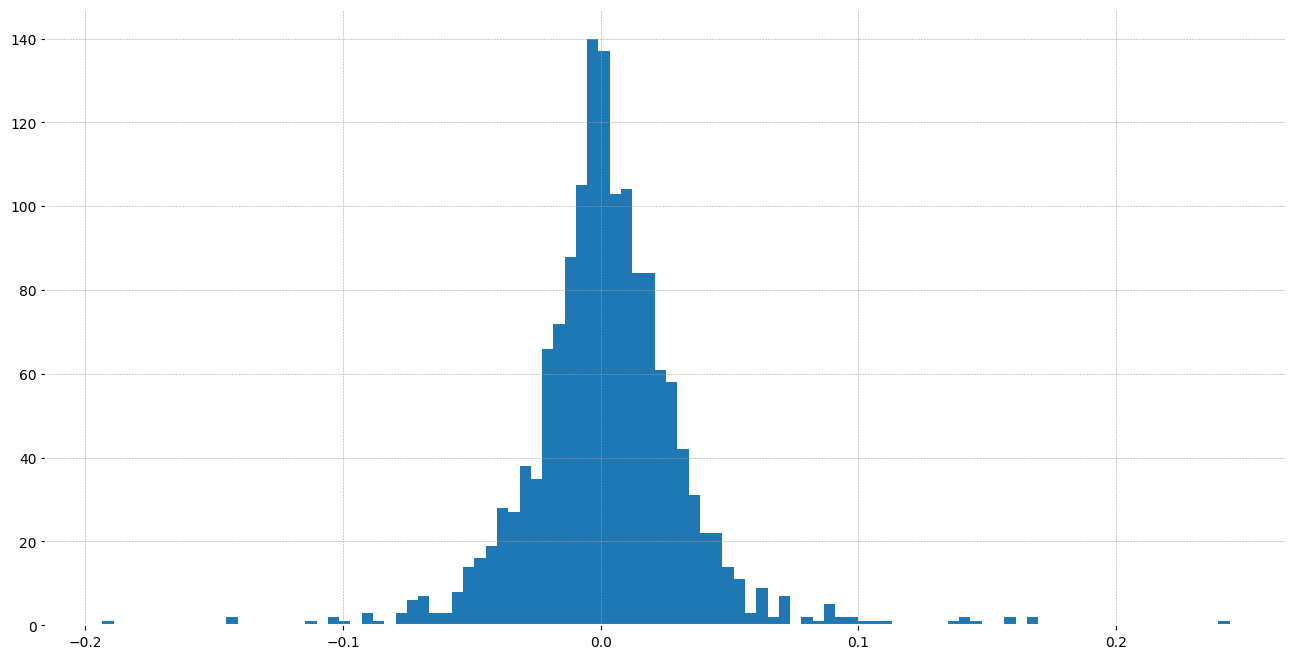

In [37]:
plt.figure(figsize=(16, 8))
tesla['returns'].hist(bins=100)

<Axes: >

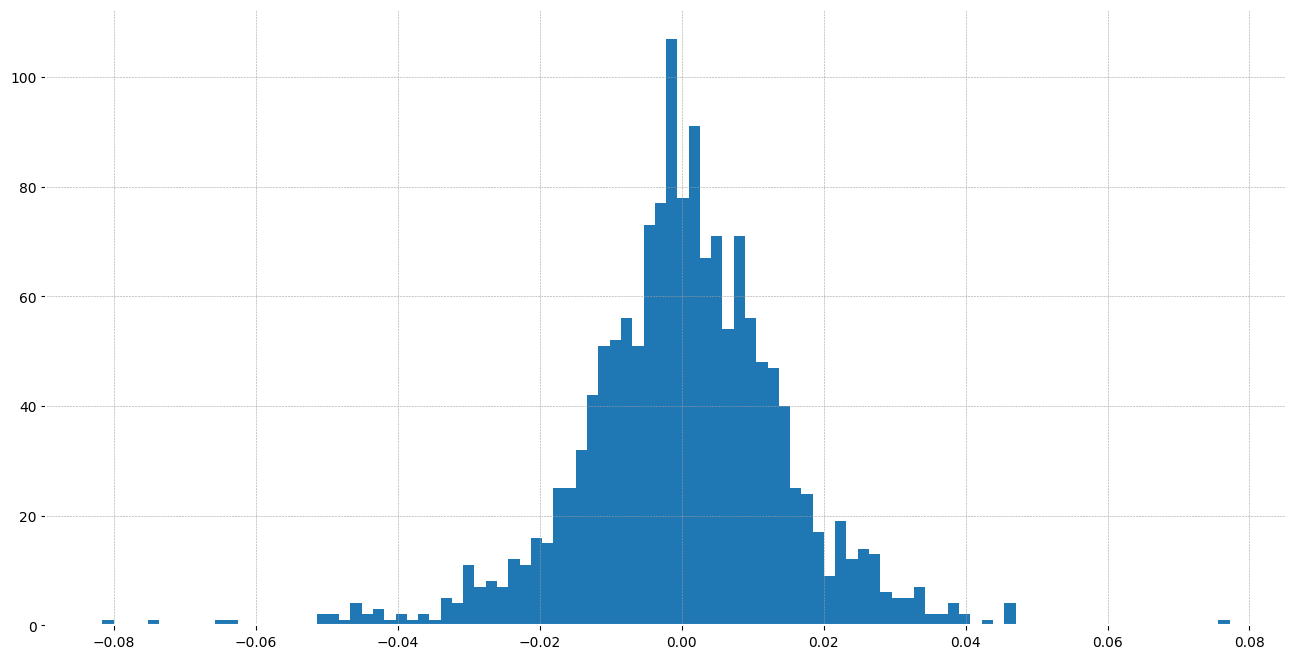

In [38]:
plt.figure(figsize=(16, 8))
ford['returns'].hist(bins=100)

<Axes: >

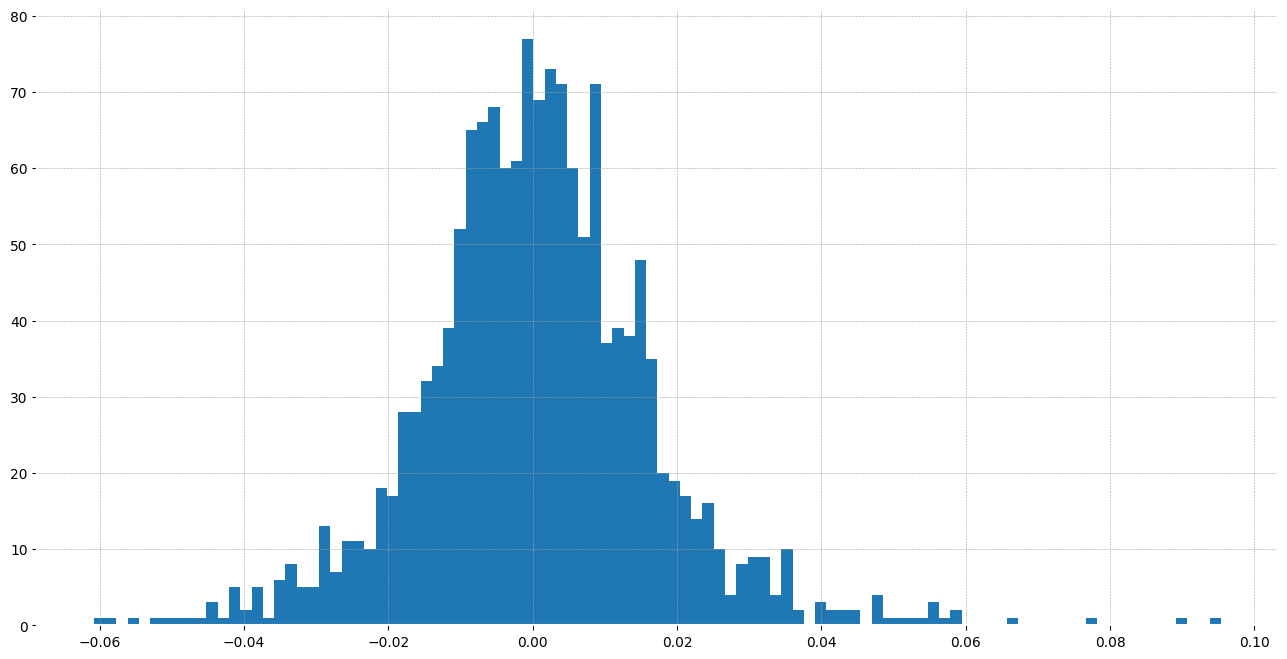

In [39]:
plt.figure(figsize=(16, 8))
gm['returns'].hist(bins=100)

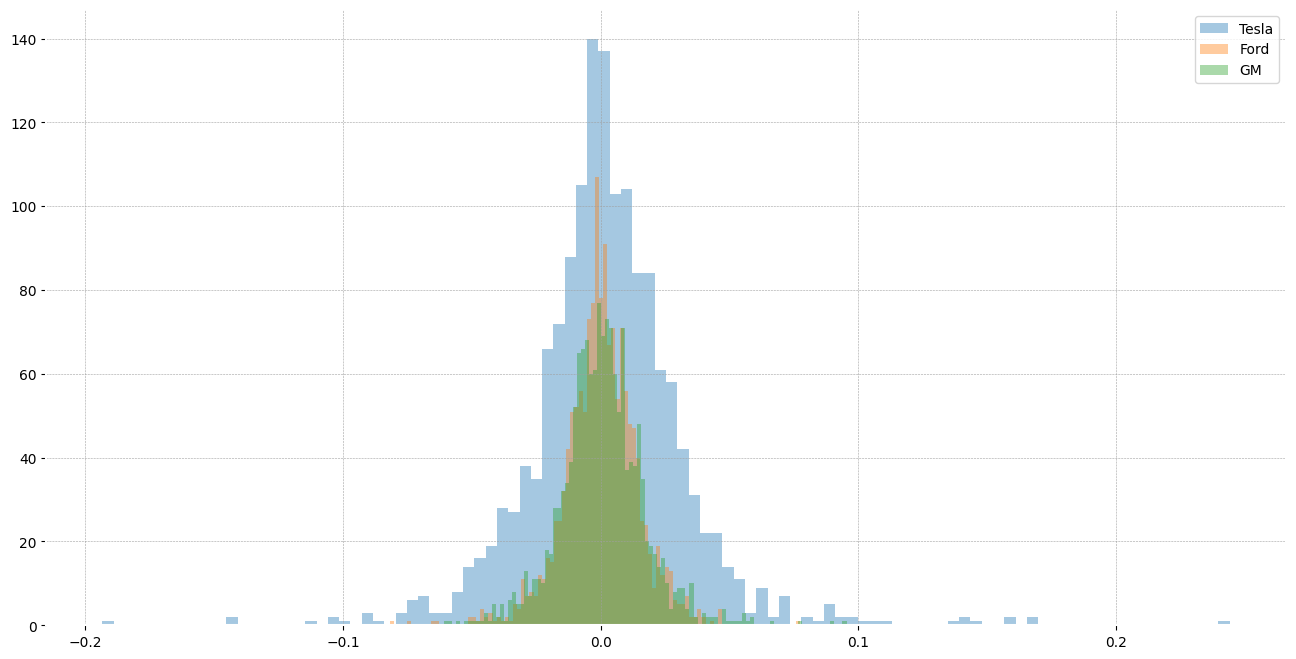

In [40]:
plt.figure(figsize=(16, 8))
tesla['returns'].hist(bins=100, label="Tesla", alpha=0.4)
ford['returns'].hist(bins=100, label="Ford", alpha=0.4)
gm['returns'].hist(bins=100, label="GM", alpha=0.4)
plt.legend();


tesla is more volatile compared to GM and ford. lets take a look at other visual to establish the point

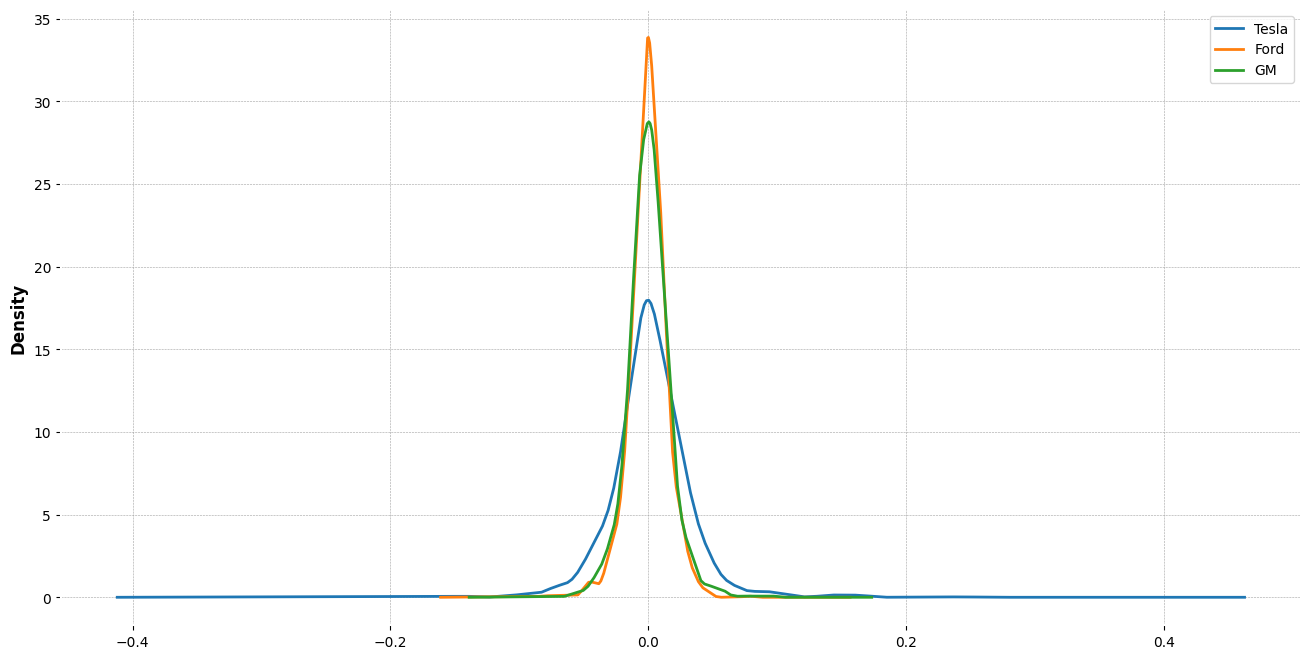

In [42]:
plt.figure(figsize=(16, 8))
tesla['returns'].plot(kind='kde', label="Tesla")
ford['returns'].plot(kind='kde', label="Ford")
gm['returns'].plot(kind='kde', label="GM")
plt.legend();

In [43]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['TSLA returns', 'FORD returns', 'GM returns']

<Axes: >

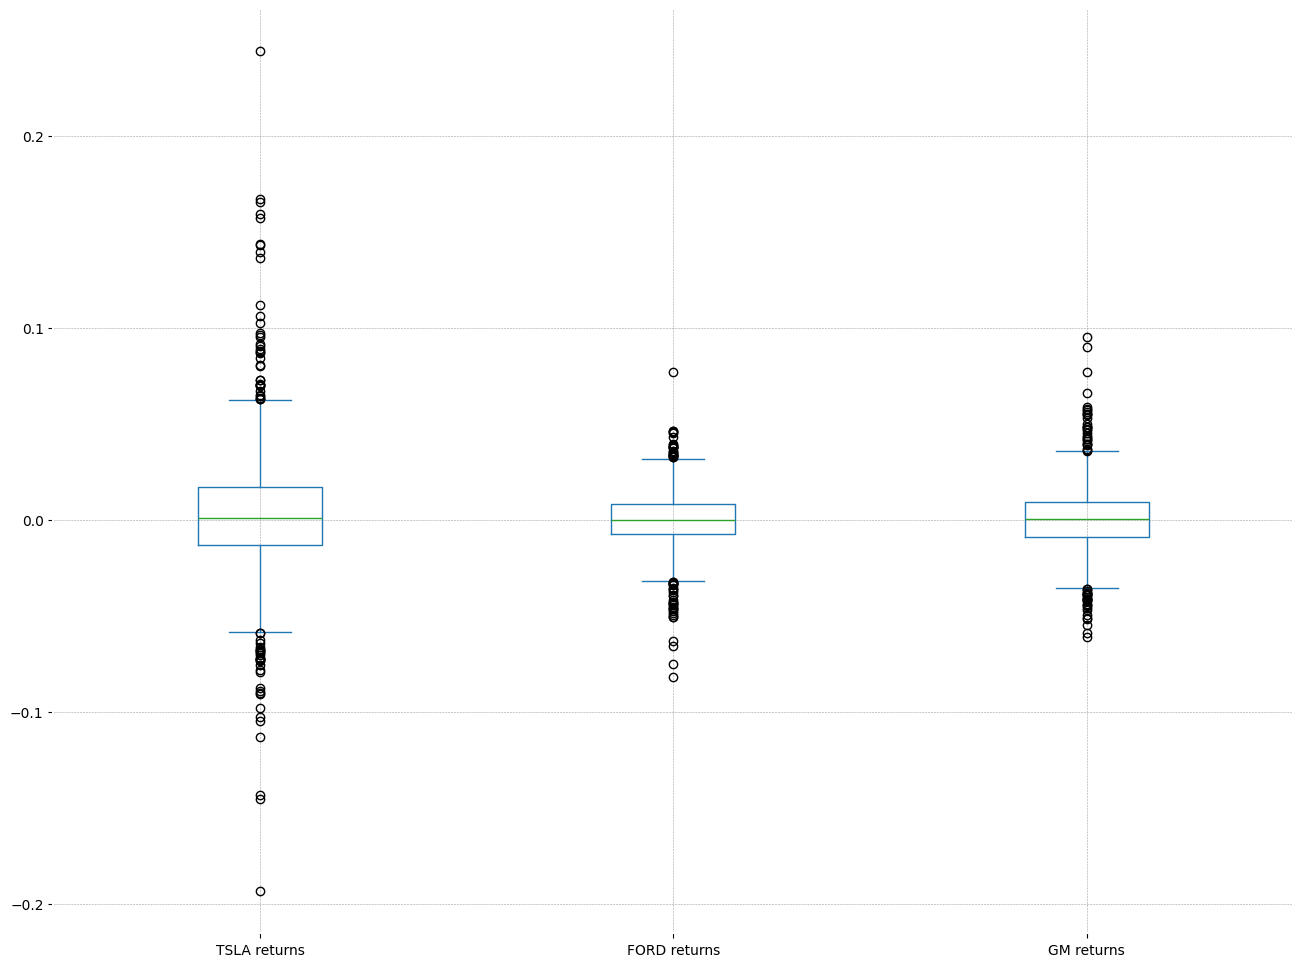

In [44]:
box_df.plot(kind='box', figsize=(16,12))

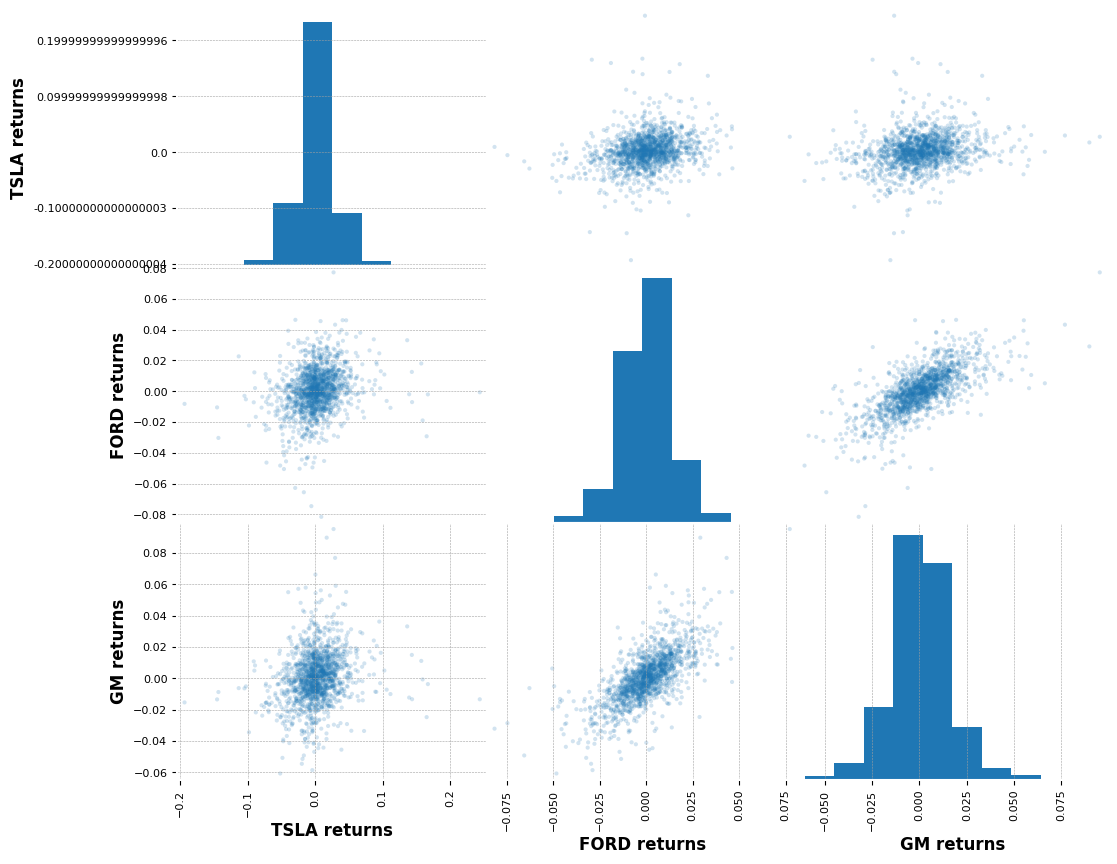

In [45]:
scatter_matrix(box_df, alpha=0.2, figsize=(12, 10));

GM and ford do have relationship

<Axes: xlabel='GM returns', ylabel='FORD returns'>

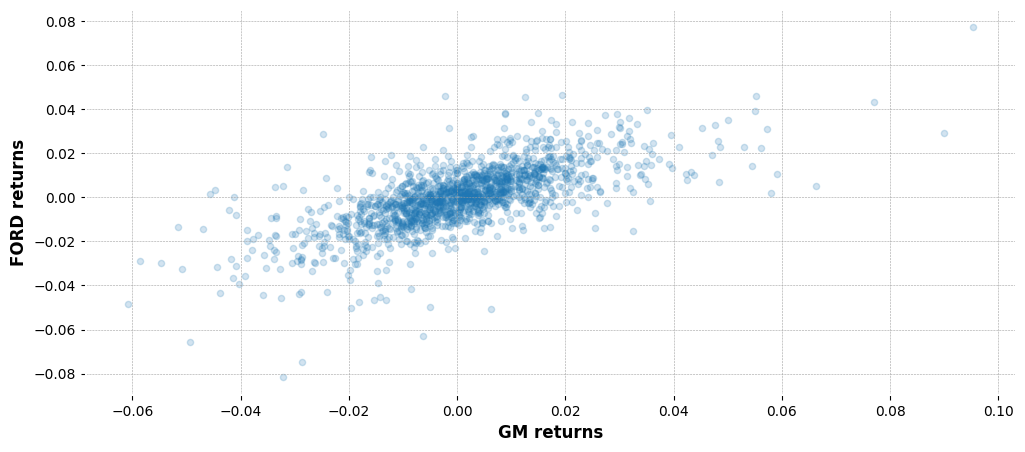

In [47]:
box_df.plot(kind='scatter', x='GM returns', y='FORD returns', alpha=0.2, figsize=(12, 5))

as much as daily returns can give you view of the profit of lose daily it does not give in totality what the returns are since invest in the stock till presnt time you return relative to you initial investment.
We can calculate cumulative return to get a view on that.

$$ i_t = (1 + r_t) * (i_{t-1}) $$

In [48]:
tesla['Cumulative returns'] = (1 + tesla['returns'] ).cumprod()
ford['Cumulative returns'] = (1 + ford['returns'] ).cumprod()
gm['Cumulative returns'] = (1 + gm['returns'] ).cumprod()

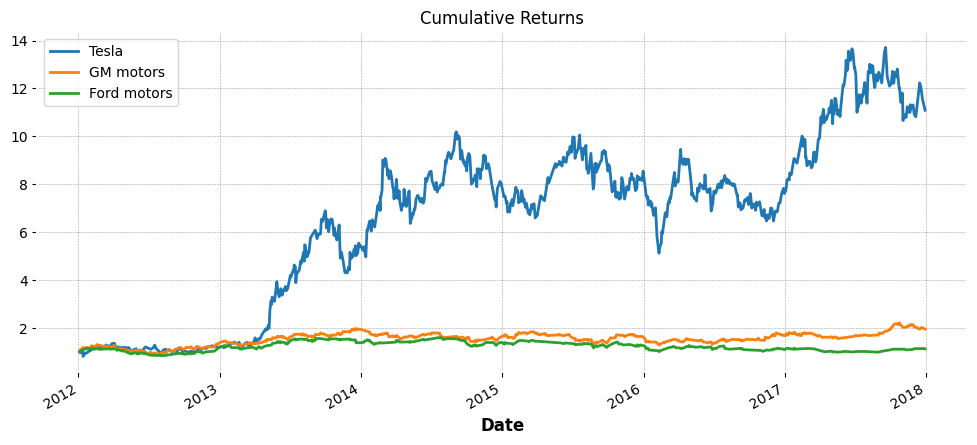

In [49]:
tesla['Cumulative returns'].plot(label="Tesla", figsize=(12,5), title="Cumulative Returns")
gm['Cumulative returns'].plot(label='GM motors')
ford['Cumulative returns'].plot(label='Ford motors')
# plt.xlim('2012-1-1', '2018-1-1')
plt.legend()

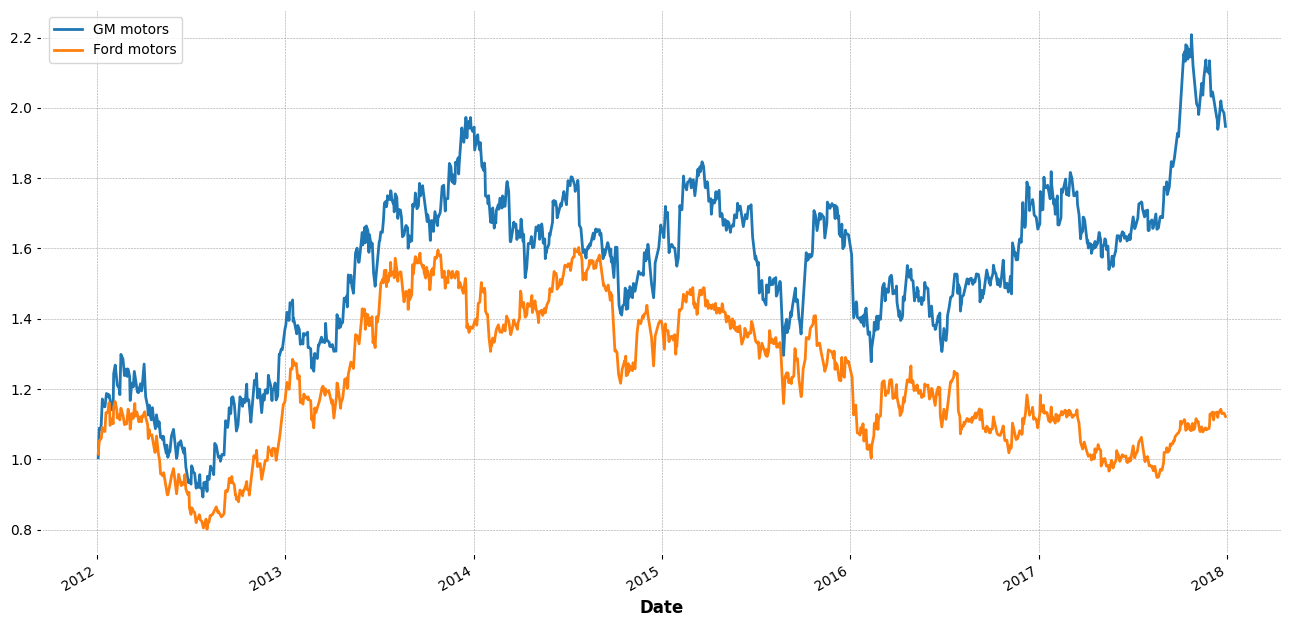

In [53]:
gm['Cumulative returns'].plot(label='GM motors', figsize=(16, 8))
ford['Cumulative returns'].plot(label='Ford motors')
plt.legend()

ford had the lowest cumulative returns